<a href="https://colab.research.google.com/github/DanielRaiicHu/optimizacion_aeroportuaria/blob/main/optimizacion_aeroportuaria.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# <font color='#0C4AC6'>**Optimización Aeroportuaria**</h1>

## <font color='#276CF2'>**1. Explorando los datos**</h2>



### <font color='#6595F6'>**Entendiendo el conjunto de datos**</h3>


In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [2]:
url = 'https://raw.githubusercontent.com/DanielRaiicHu/optimizacion_aeroportuaria/main/flights.csv'

# Lectura del archivo CSV y almacenamiento en el DataFrame 'datos'
datos = pd.read_csv(url)

# Verificación del tamaño del DataFrame
datos.shape # filas: 71175, columnas: 11

(71175, 11)

In [3]:
datos.head()
# flight_id: id del vuelo
# airline: aerolínea
# aircraft_type: tipo de aeronave
# schengen: indica si el origen pertenece al espacio Schengen
# origin: aeropuerto de origen
# arrival_time: hora de llegada (en formato decimal)
# departure_time: hora de salida (en formato decimal)
# day: día del año (1 a 365)
# year: año del vuelo
# is_holiday: indica si el día es festivo
# delay: retraso del vuelo en minutos.segundos

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
# Ejemplo para convertir parte decimal de minutos a segundos
# Los segundos se calculan multiplicando la parte decimal por 60
round(.205981 * 60)  # Ejemplo: 70.205981 → 70 minutos y 12 segundos

12

In [5]:
minutos_decimales = 70.205981
# Obtener los minutos
minutos = int(minutos_decimales)
# Obtener la parte decimal
decimal = minutos_decimales - minutos
# Convertir la parte decimal a segundos
segundos = round(decimal * 60)
print(f"{minutos} minutos y {segundos} segundos")

70 minutos y 12 segundos


In [6]:
# Información general del DataFrame (nombres de columnas, cantidad de valores no nulos, tipo de datos)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [7]:
# Estadísticas descriptivas de variables numéricas
datos.describe()

# Muestra métricas como:
# count: número de registros
# mean: promedio
# std: desviación estándar
# min, max: valores mínimo y máximo
# 25%, 50%, 75%: percentiles

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [8]:
# Estadísticas descriptivas de variables categóricas
datos.describe(include = 'O')

# 'count': cantidad de registros no nulos
# 'unique': cantidad de valores únicos
# 'top': valor más frecuente
# 'freq': frecuencia del valor más frecuente

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


**Análisis y descripción**

**¿Qué hace?**

* Carga un dataset de retrasos de vuelos desde GitHub.

* Muestra una vista inicial (head) para entender la estructura.

* Explica el significado de cada columna.

* Realiza una conversión de parte decimal de minutos a segundos para interpretar mejor la variable delay.

* Consulta metadatos (info) para identificar tipos de datos y valores nulos.

* Genera estadísticas descriptivas para variables numéricas y categóricas.

**¿Qué se identificó?**

* Tamaño: 71.175 registros y 11 columnas.

* Tipos de datos: combinación de enteros, flotantes, objetos y booleanos.

* **delay:** puede tener valores negativos (indica vuelos adelantados) y muy altos (hasta 125 minutos).

* Categorías:

>* airline: 3 aerolíneas, la más frecuente es BZ.
>
>* aircraft_type: 6 tipos de aeronaves, predominando Airbus A320.
>
>* schengen: 2 categorías (schengen / non-schengen).
>
>* origin: 10 aeropuertos de origen, más frecuente TZF.

**¿Qué se puede hacer?**

* Convertir arrival_time y departure_time de formato decimal a horas/minutos legibles.

* Transformar delay a formato minutos y segundos para mayor claridad.

* Analizar la distribución de retrasos y valores negativos.

* Explorar si los días festivos (is_holiday) influyen en los retrasos.

**Conclusión breve:**

* El dataset está completo (sin nulos), variado en tipos de datos y listo para iniciar exploración gráfica y preprocesamiento.

* Se observa que la variable delay puede representar tanto retrasos como adelantos, lo que influirá en cómo se clasifique el problema de predicción.

### <font color='#6595F6'>**Análisis gráfico del conjunto de datos**</h3>

In [9]:
# Importamos librerías para visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Agrupamos por aérolineas y nuestra variable respuesta es delay (retraso)
datos.groupby('airline')['delay'].mean()

# Lo anterior devuelve una Serie con aerolínea como índice y el promedio de delay como valor.

,delay
airline,
BZ,3.077595
MM,40.498007
YE,25.772248


In [11]:
# .reset_index() convierte el índice (airline) en columna normal.

# Si queremos el resultado como DataFrame y no como índice:
datos.groupby('airline')['delay'].mean().reset_index()


,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


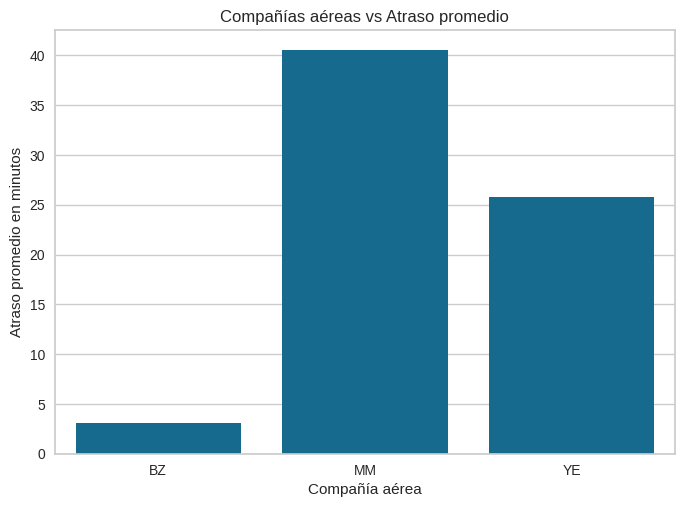

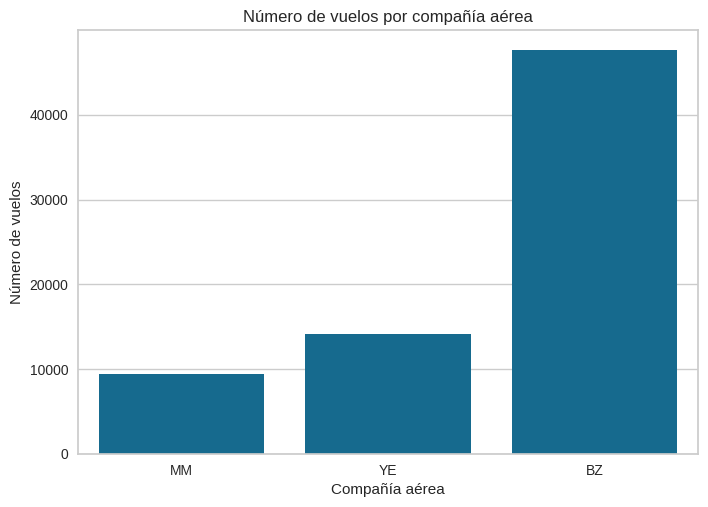

In [12]:
# Creamos un DataFrame con el retraso promedio por aerolínea
avg_delay = datos.groupby('airline')['delay'].mean().reset_index() # average delay o  promedio de retraso

# Gráfico de barras: aerolínea vs retraso promedio
sns.barplot(x='airline', y='delay', data= avg_delay)
plt.title('Compañías aéreas vs Atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

print('\n')

# Gráfico de barras de cantidad de vuelos por aerolínea
sns.countplot(data=datos, x='airline')
plt.title('Número de vuelos por compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

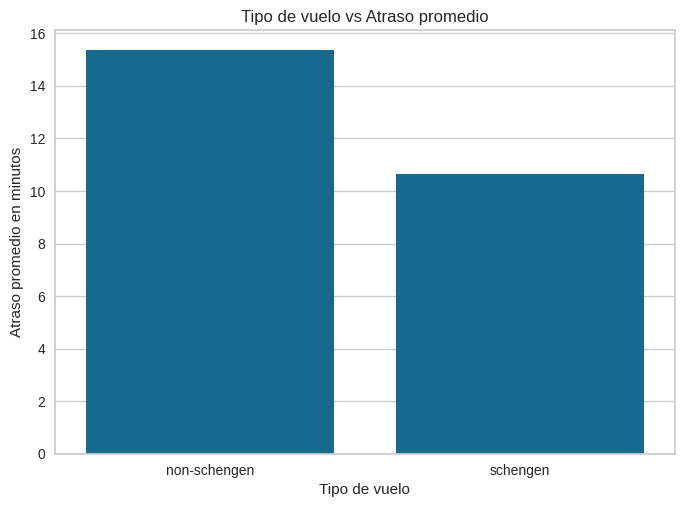

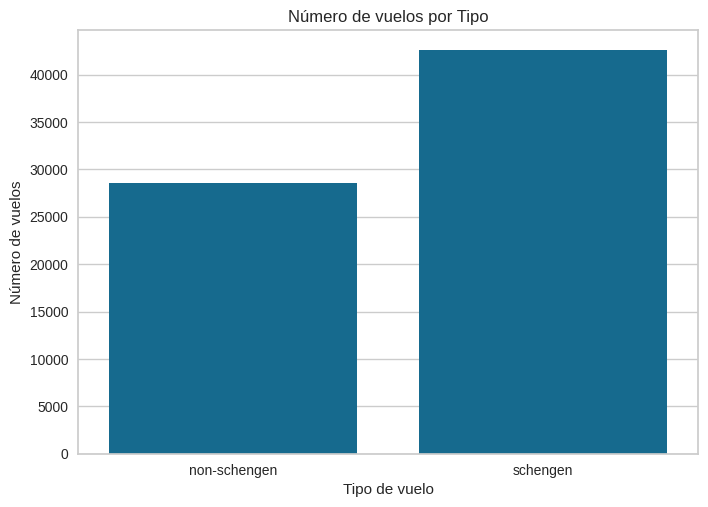

In [13]:
# Retraso promedio por tipo de vuelo (schengen / non-schengen)

avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()

sns.barplot(x='schengen', y='delay', data= avg_delay)
plt.title('Tipo de vuelo vs Atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

print('\n')

# Número de vuelos por tipo de vuelo
sns.countplot(data=datos, x='schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

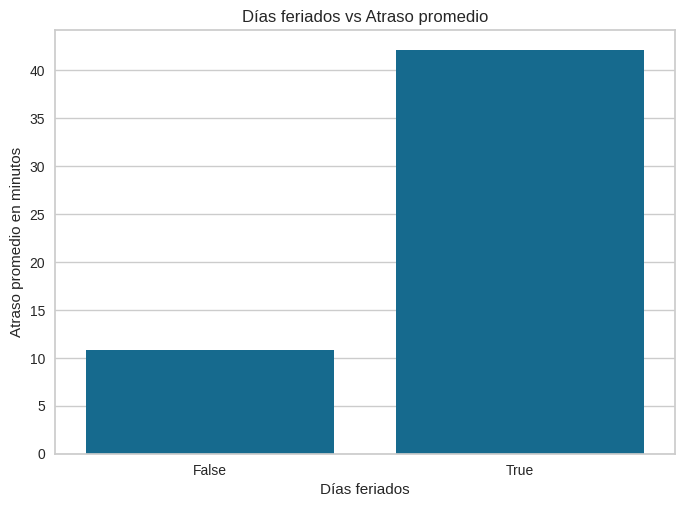

In [14]:
# Retraso promedio en días festivos vs no festivos
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index() # average delay o  promedio de retraso

sns.barplot(x='is_holiday', y='delay', data= avg_delay)
plt.title('Días feriados vs Atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

In [15]:
# .value_counts: Devuelve una Serie que contiene los conteos de valores únicos en la columna 'aircraft_type'.
# .index: Obtienes un objeto Index que contiene los valores únicos de 'aircraft_type' ordenados según sus conteos.
datos['aircraft_type'].value_counts().index
# 'Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175', 'Boeing 737', 'Boeing 777'

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

In [16]:
# Conteo de vuelos por tipo de aeronave
# value_counts() devuelve el conteo de cada categoría
datos['aircraft_type'].value_counts()

,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


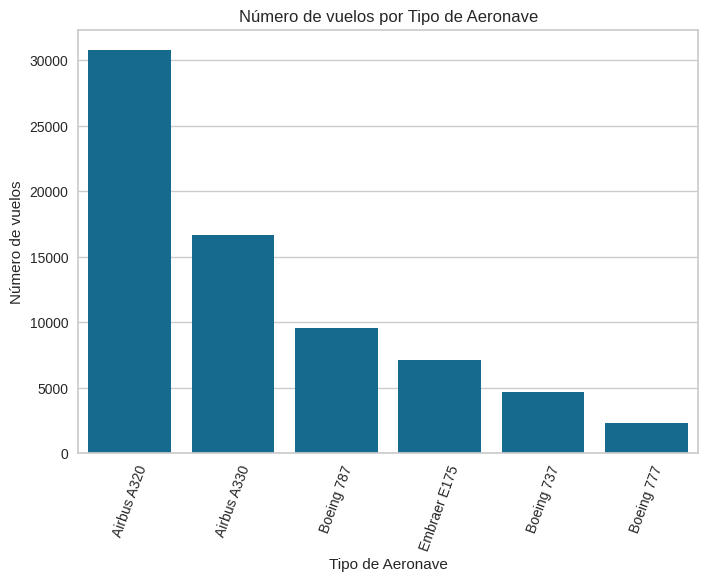

In [17]:
# value_counts().index devuelve solo el orden de las categorías por frecuencia
order = datos['aircraft_type'].value_counts().index

# Gráfico de número de vuelos por tipo de aeronave (ordenado por frecuencia)
sns.countplot(data=datos, x='aircraft_type', order = order)
plt.title('Número de vuelos por Tipo de Aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

**Análisis y descripción**

**¿Qué hace?**

* Agrupa los datos por variables categóricas (airline, schengen, is_holiday, aircraft_type) para calcular el retraso promedio.

* Genera gráficos comparativos para:

>* Retraso promedio por aerolínea, tipo de vuelo y días festivos.
>
>* Número de vuelos por aerolínea, tipo de vuelo y tipo de aeronave.

**¿Qué se identificó?**

**Aerolíneas:**

* **MM:** mayor retraso promedio (~40 min).

* **YE:** retraso intermedio (~25 min).

* **BZ:** menor retraso promedio (~3 min), pero con más vuelos que las demás.

**Tipo de vuelo:**

* **non-schengen:** retraso promedio mayor (~15 min).

* **schengen:** menor retraso (~11 min) pero más vuelos.

**Días festivos:**

* Retrasos mucho mayores (~41 min) comparado con días normales (~11 min).

**Tipo de aeronave:**

* **Más frecuente:** Airbus A320 (30.778 vuelos).

* **Menos frecuente:** Boeing 777 (2.317 vuelos).

**¿Qué se puede hacer?**

* **Aerolíneas:** investigar causas operativas por las que MM y YE tienen más retrasos.

* **Tipo de vuelo:** evaluar si la complejidad operativa de vuelos internacionales (non-schengen) influye en los retrasos.

* **Festivos:** planificar recursos extra en días festivos para reducir retrasos.

* **Aeronaves:** analizar si ciertos modelos (p. ej. Airbus A320) tienen mejor puntualidad debido a su alta frecuencia.

**Conclusión breve**

* La aerolínea BZ es la más puntual y con más vuelos.

* Los vuelos non-schengen y en días festivos presentan mayores retrasos, lo que puede servir como variable predictora clave en el modelo de Machine Learning.

* Se confirma que el tipo de aeronave y la aerolínea podrían ser factores importantes para predecir retrasos.

### <font color='#6595F6'>**Analizando la distribución de los datos**</h3>

Para determinar el ancho de los bins en un histograma:
https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

**Descripción de métodos nuevos antes de los código**

* **`np.percentile():`** Calcula el percentil especificado de un array.
Ejemplo: np.percentile(columna, 75) devuelve el valor del percentil 75.

* **`IQR (Interquartile Range):`** Diferencia entre percentil 75 (Q3) y percentil 25 (Q1). Mide la dispersión central de los datos.

* **`np.power(a, b):`** Eleva a a la potencia b.

* **`Regla de Freedman-Diaconis:`** Fórmula estadística para calcular el ancho óptimo de los bins en un histograma:
ancho = 2 * IQR * n^(-1/3), donde n es el número de observaciones.

* **`plt.axhline():`** Dibuja una línea horizontal en el gráfico.

* **`plt.axvline():`** Dibuja una línea vertical en el gráfico.

* **`plt.tight_layout():`** Ajusta automáticamente el espaciado de los elementos de la figura para evitar solapamientos.

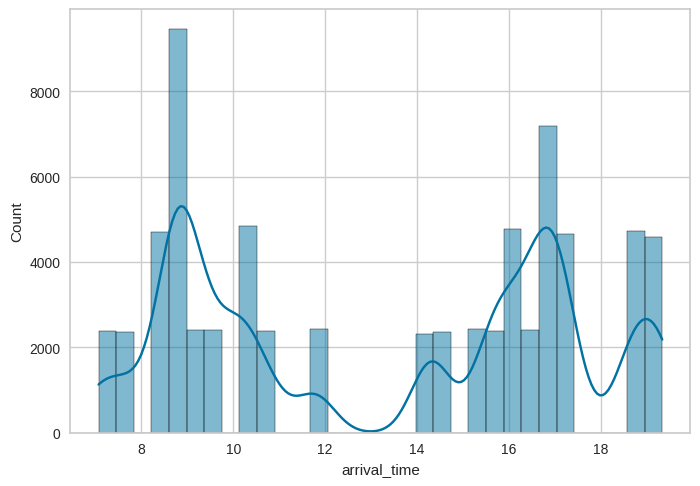

In [18]:
# El ancho de este gráfico no es el más correcto
# Para ello utilizaremos la regla de Freedman Diaconis, para determinar el ancho de los bins

# Histograma inicial del horario de llegada (arrival_time) con curva KDE (densidad)
sns.histplot(data=datos, x='arrival_time',kde=True);

In [19]:
import numpy as np

In [20]:
# Función para determinar el ancho óptimo de los bins usando la regla de Freedman-Diaconis
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

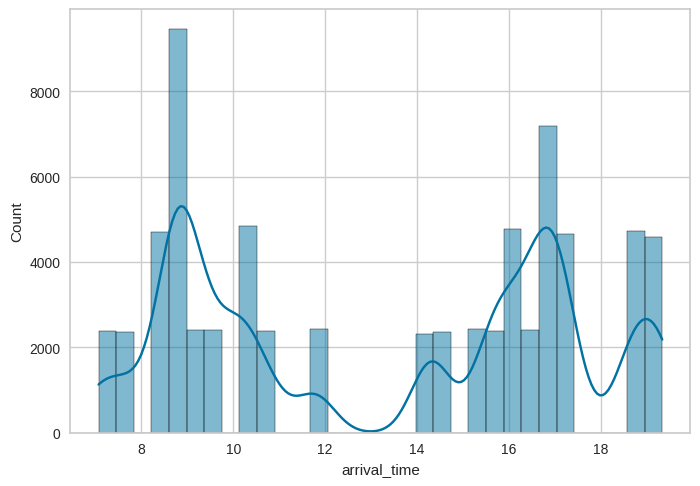

In [21]:
# Histograma del horario de llegada con binwidth optimizado
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos, x='arrival_time',kde=True, binwidth=binwidth);

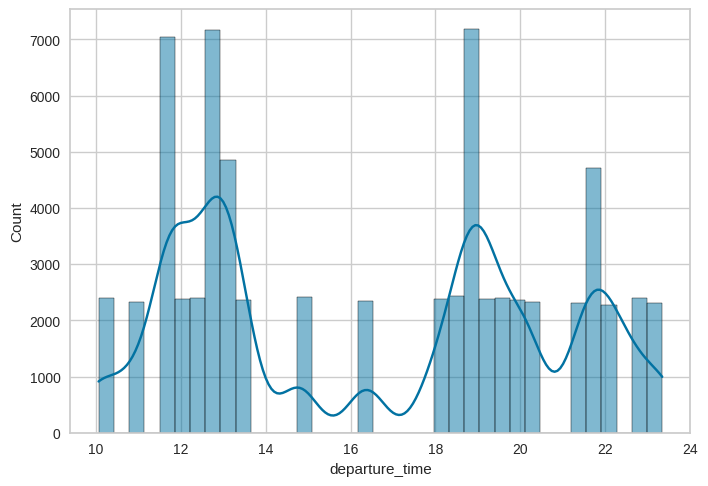

In [22]:
# Histograma del horario de salida con binwidth optimizado
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos, x='departure_time',kde=True, binwidth=binwidth);

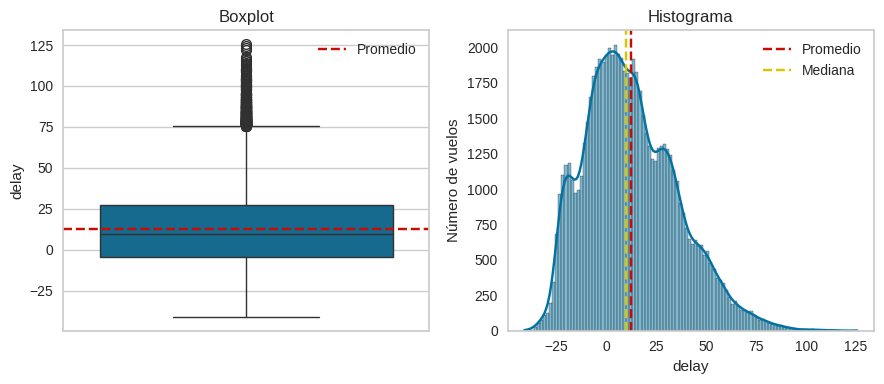

In [23]:
# Gráfico de distribución de la variable respuesta (retrasos en los vuelos)

# Calculamos estadísticas de la variable delay
atraso_promedio = datos['delay'].mean() # Almacenamos el atraso promedio
atraso_mediana = datos['delay'].median() # Almacenamos la mediana de los atrasos

# Boxplot de 'delay'
fix, ax = plt.subplots(1,2, figsize=(9,4)) # 2 gráficos lado a lado
sns.boxplot(data=datos, y='delay', ax=ax[0]) # este será el primer gráfico (izquierda)
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color = 'r', linestyle='--', label='Promedio')
ax[0].legend()


# Histograma de 'delay'
binwidth = ancho_bin (datos, 'delay')

sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth) # ese será el segundo gráfico (derecha)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color = 'r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color = 'y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

**Análisis y descripción**

**¿Qué hace?**

* Crea histogramas de arrival_time, departure_time y delay usando un ancho de bin calculado con la regla de Freedman-Diaconis para mejorar la representación de la distribución.

* Compara la distribución de delay en dos formas:

>* Boxplot: para visualizar mediana, dispersión y outliers.
>
>* Histograma: para ver la forma de la distribución y compararla con promedio y mediana.

**¿Qué se identificó?**

* **Horarios de llegada y salida:**

>* Picos marcados alrededor de ciertas horas específicas (posibles horarios punta).
>
>* Distribución bimodal, lo que indica más de un bloque horario de alta actividad.

* **Retrasos (delay):**

>* Promedio ≈ 12 min, mediana ≈ ligeramente menor.
>
>* Muchos valores cercanos a cero, pero con presencia de retrasos altos (outliers).
>
>* Valores negativos (adelantos) también presentes.

* **Dispersión y outliers:**

>* El boxplot muestra una gran cantidad de outliers por encima de 75 minutos.
>
>* Distribución asimétrica hacia la derecha (cola larga positiva).

**¿Qué se puede hacer?**

* Analizar la causa de los picos en horas específicas para llegada y salida.

* Investigar los vuelos con retrasos extremos para identificar patrones.

* Decidir si se transformará delay en variable binaria (retrasado/no retrasado) para clasificación.

* Considerar si se deben recortar outliers o aplicar transformaciones para el modelo.

**Conclusión breve**

* Hay horarios de mayor actividad que podrían asociarse a más retrasos.

* Los retrasos no siguen una distribución normal, tienen asimetría y outliers, lo que influirá en cómo se entrene el modelo de predicción.

---
**En esta clase, aprendiste a:**
* Analizar las estadísticas descriptivas de los datos;
* Obtener información relevante de los datos, como la cantidad de datos nulos y el tipo de las columnas;
* Construir el análisis gráfico de los datos;
* Construir la visualización gráfica de la distribución de los datos.
---

## <font color='#276CF2'>**2. Feature Engineering**</h2>

La ingeniería de características (feature engineering en inglés) es el proceso de seleccionar, transformar y crear nuevas variables (características o "features") a partir de datos sin procesar para mejorar el rendimiento de los modelos de aprendizaje automático. En esencia, es el puente entre los datos brutos y el algoritmo de aprendizaje, haciendo que los datos sean más comprensibles y útiles para el modelo.

### <font color='#6595F6'>**Creando nuevas columnas**</h3>

**Descripción de métodos nuevos antes del código**

* **`astype(str):`** Convierte una serie o columna a tipo cadena (string).

* **`pd.to_datetime():`** Convierte datos en formato de fecha y hora a un tipo datetime de pandas, usando un formato específico.

>* **`%Y`** → año con 4 dígitos.
>
>* **`%j`** → día del año (1–366).

* **`dt.weekday:`** Devuelve el día de la semana como número (lunes=0, domingo=6).

* **`.isin([valores]):`** Devuelve True si el valor está dentro de la lista dada.

* **`dt.day_name():`** Devuelve el nombre del día de la semana (e.g., "Monday").

In [24]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [25]:
# Formato año-mes-día

# Creamos nueva columna 'date' combinando año y día del año (+1 porque el dataset inicia en día 0)
datos['date'] = datos['year'].astype(str) + '-' +(datos['day']+1).astype(str) # Convertimos 'year' y 'day' a string para concatenar

# Convertimos la columna 'date' a tipo datetime
# Formato '%Y-%j' indica "año-día_del_año"
datos['date'] = pd.to_datetime(datos['date'],format ='%Y-%j') # %j transforma la cantidad de días en formato día-mes

datos.head(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01


In [26]:
# Creamos una columna booleana que indica si la fecha cae en fin de semana

# dt.weekday → lunes=0 ... domingo=6, por eso usamos isin([5,6])
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6]) # 5: sábado, 6: domingo

# Creamos columna con el nombre del día de la semana (lunes, martes, etc.)
datos['day_name'] = datos['date'].dt.day_name()

datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
70703,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,333,2022,False,-11.074803,2022-11-30,False,Wednesday
41325,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,200,2017,False,17.853013,2017-07-20,False,Thursday
57375,1,BZ,Airbus A320,non-schengen,CNU,15.496519,18.496519,175,2020,False,30.379041,2020-06-24,False,Wednesday
47628,23,YE,Embraer E175,schengen,TCY,18.801235,21.801235,255,2018,False,10.318667,2018-09-13,False,Thursday
52331,6,YE,Boeing 787,schengen,AUZ,17.033688,19.033688,203,2019,False,27.443188,2019-07-23,False,Tuesday


**Análisis y descripción**

**¿Qué hace?**

* Implementa ingeniería de características creando nuevas variables a partir de columnas existentes:

>* date: fecha completa en formato año-mes-día usando año y día del año.
>
>* is_weekend: identifica si el vuelo ocurre sábado o domingo.
>
>* day_name: nombre del día de la semana.

**¿Qué se identificó?**

* Ahora se pueden analizar patrones de retrasos según:

>* Temporada (meses, estaciones del año).
>
>* Día de la semana.
>
>* Diferencia entre fines de semana y días laborales.

* Facilita agrupar y segmentar datos para análisis exploratorio y entrenamiento del modelo.

**¿Qué se puede hacer?**

* Usar is_weekend como variable categórica binaria en el modelo.

* Evaluar si ciertos días presentan más retrasos.

* Combinar esta información con la columna is_holiday para detectar patrones en días no laborables.

**Conclusión breve**

* Estas nuevas características enriquecen el dataset y podrían mejorar la capacidad predictiva del modelo, ya que la fecha y el día de la semana suelen influir en la puntualidad de los vuelos.



### <font color='#6595F6'>**Feature encoding**</h3>

**Descripción de métodos nuevos antes del código**

* **`replace({}):`** Sustituye valores en un DataFrame o Serie según un diccionario de mapeo.
Ejemplo: {'non-schengen':0, 'schengen':1} reemplaza cadenas por enteros.

* **`pd.get_dummies():`** Realiza one-hot encoding, es decir, crea columnas binarias (0/1) para cada categoría de una variable categórica.

>* **`columns=`** → lista de columnas a codificar.
>
>* **`dtype=int`** → especifica que los valores 0/1 sean de tipo entero.

* **`warnings.filterwarnings('ignore'):`** Evita que se muestren advertencias en la ejecución del código (no afecta los resultados).

In [27]:
# Revisamos información general del DataFrame (tipos de datos y nulos)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [28]:
import warnings
# Ignoramos mensajes de advertencia para mantener la salida limpia
warnings.filterwarnings('ignore')

In [29]:
# Reemplazamos valores categóricos por números binarios (0/1)

# 'schengen': vuelos fuera = 0, dentro = 1
datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen': 1})

# 'is_holiday': no festivo = 0, festivo = 1
datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True: 1})

# 'is_weekend': día laboral = 0, fin de semana = 1
datos['is_weekend'] = datos['is_weekend'].replace({False: 0, True: 1})

# Muestra aleatoria de 3 filas para verificar cambios
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
64723,8,BZ,Airbus A320,1,ZQO,15.729617,18.729617,299,2021,0,1.784756,2021-10-27,0,Wednesday
27772,24,BZ,Airbus A320,1,FJB,9.668655,12.668655,26,2015,0,10.880223,2015-01-27,0,Tuesday
43234,23,YE,Embraer E175,1,TCY,18.801235,21.801235,327,2017,0,-4.537790,2017-11-24,0,Friday


In [30]:
# Lista de columnas categóricas que vamos a codificar con one-hot encoding
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

# Vista previa del DataFrame codificado (sin modificar datos originales)
# .get_dummies: Método de pandas que permite codificar nuestras variables con 0's y 1's
pd.get_dummies(data=datos, columns=categoricas, dtype=int).head(2) # lo visualizamos

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0


In [31]:
# Generamos el DataFrame final con variables codificadas
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int) # creamos el dataframe con los datos codificados

# Muestra aleatoria de 5 filas para verificar el resultado
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
56007,18,1,14.258911,20.258911,83,2020,0,17.215327,2020-03-24,0,...,0,1,0,0,0,0,0,0,1,0
3232,2,1,19.196804,22.196804,215,2010,0,1.959213,2010-08-04,0,...,0,0,1,0,0,0,0,0,0,1
64344,25,0,19.341235,23.341235,274,2021,0,11.161089,2021-10-02,1,...,0,0,0,0,0,1,0,0,0,0
61174,16,0,17.041281,20.041281,63,2021,0,79.956350,2021-03-05,0,...,0,0,0,1,0,0,0,0,0,0
20861,26,0,8.885071,10.885071,295,2013,0,33.301655,2013-10-23,0,...,1,0,0,0,0,0,0,0,0,1


**Análisis y descripción**

**¿Qué hace?**

* **Conversión de variables booleanas/categóricas a numéricas:**

>* schengen, is_holiday e is_weekend pasan a ser binarias (0/1).

* **One-hot encoding:**

>* Variables categóricas (airline, aircraft_type, origin, day_name) se convierten en varias columnas binarias, una por categoría.

* **Resultado:**

>* datos_codificados es un DataFrame listo para ser usado por modelos de Machine Learning que requieren datos numéricos.

**¿Qué se identificó?**

* La estructura del dataset pasa de 11 columnas originales a muchas más, debido al one-hot encoding.

* Cada categoría única ahora está representada como una columna separada, eliminando la dependencia de variables categóricas originales.

**¿Qué se puede hacer?**

* Guardar datos_codificados como base para la etapa de modelado.

* Usar técnicas como drop_first=True si se quiere evitar multicolinealidad.

* Normalizar o escalar columnas numéricas si el modelo lo requiere (p.ej. regresión logística, SVM).

**Conclusión breve**

* Se completó la transformación de todas las variables a formato numérico, paso clave antes de entrenar un modelo de Machine Learning, garantizando que los algoritmos puedan interpretar todas las columnas.

### <font color='#6595F6'>**Limpiando los datos**</h3>

**Descripción de métodos nuevos antes del código**

* **`.corr():`** Calcula la matriz de correlación entre columnas numéricas. Por defecto usa el método de Pearson (mide correlación lineal).

* **`drop(columns=[]):`** Elimina columnas del DataFrame.

* **`sample(n):`** Devuelve una muestra aleatoria de n filas del DataFrame.

In [32]:
# Calculamos la correlación entre arrival_time y departure_time
# Esto nos permite identificar si ambas variables aportan información similar
datos[['arrival_time', 'departure_time']].corr()
# Resultado: correlación muy alta (0.9737) → casi colineales

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [33]:
# Verificamos la estructura del DataFrame codificado
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [34]:
# Eliminamos columnas que no aportan valor predictivo o pueden causar problemas en el modelo

# flight_id: identificador único (no predictivo)
# departure_time: altamente correlacionado con arrival_time (evitar multicolinealidad)
# day y year: ya tenemos la fecha completa y variables derivadas
# date: tipo datetime, no se usa directamente en el modelo
df = datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])

# Mostramos una muestra aleatoria de 10 filas para verificar el nuevo DataFrame limpio
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
70117,1,8.923441,0,14.514358,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
67685,0,15.496519,0,38.478214,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
64055,1,18.635384,0,-21.720084,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
43470,1,18.635384,0,6.675691,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
26904,1,18.635384,0,-24.142759,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
33205,0,8.939996,0,10.019914,1,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
39051,1,8.923441,0,30.469039,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16185,0,8.939996,0,49.331706,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
58837,1,7.708301,0,0.619088,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
56365,1,14.258911,0,-3.823801,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


**Análisis y descripción**

**¿Qué hace?**

* Identifica y elimina colinealidad entre arrival_time y departure_time.

* Depura columnas irrelevantes o redundantes:

>* Identificadores únicos (flight_id).
>
>* Variables redundantes (departure_time, day, year, date).

* Genera un DataFrame (df) listo para la selección de variable objetivo y predictores.

**¿Qué se identificó?**

* Correlación muy alta (0.9737) entre arrival_time y departure_time, lo que puede perjudicar algunos modelos (p. ej. regresión logística) por multicolinealidad.

* Se mantiene arrival_time como representante de la información temporal.

**¿Qué se puede hacer?**

* Definir la variable objetivo (target) para convertir el problema en clasificación binaria.

* Realizar un escalado o normalización si el algoritmo lo requiere.

* Continuar con la partición train-test para entrenamiento y validación.

**Conclusión breve**

* Eliminamos columnas redundantes y con alta correlación, dejando un conjunto de datos más limpio y listo para el modelado, reduciendo el riesgo de multicolinealidad y mejorando la eficiencia del entrenamiento.

### <font color='#6595F6'>**Manos a la obra: ¿Cómo utilizar el OneHotEncoder de Sklearn?**</h3>

* Existen algunas formas de realizar la codificación dummy de las variables que son categóricas. Dos de ellas son usando el método get_dummies de la biblioteca Pandas y el OneHotEncoder de la biblioteca sklearn. Durante el curso, optamos por el primer enfoque. Según el código a continuación:

```
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)
df_encoded.head()
```

¡Ahora es el momento de poner en práctica otro enfoque!

* Aplica la codificación dummy en el código de la clase utilizando el OneHotEncoder de Scikit-Learn en lugar del get_dummies de la biblioteca pandas.

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [36]:
categoricas = ['airline','aircraft_type','origin','day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

datos_codif_one_hot = one_hot_enc.fit_transform(datos)
datos_codif_one_hot = pd.DataFrame(datos_codif_one_hot, columns=one_hot_enc.get_feature_names_out())
datos_codif_one_hot.head()

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0


**Analizando el código anterior paso a paso:**

**1 - `from sklearn.compose import make_column_transformer`**

* Este es un import del método make_column_transformer de la biblioteca sklearn.compose. Este método se usa para aplicar transformaciones específicas a columnas específicas de un DataFrame.

**2 - `from sklearn.preprocessing import OneHotEncoder`**

* Este es un import del OneHotEncoder de la biblioteca sklearn.preprocessing. Este es el método que realmente realiza la codificación one-hot.

**3 - `categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']`**

* Aquí, estamos definiendo una lista de nombres de columnas que queremos transformar usando la codificación one-hot, que son las mismas definidas utilizando el get_dummies.

**4 - `one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categoricas), remainder='passthrough')`**

* Aquí, estamos creando un ColumnTransformer que aplica el OneHotEncoder a las columnas especificadas en categoricas. El argumento handle_unknown='ignore' significa que el OneHotEncoder ignorará cualquier categoría desconocida que pueda aparecer durante la transformación. El argumento remainder='passthrough' significa que cualquier columna que no esté especificada para la transformación será pasada a través sin cambios.

**5 - `datos = one_hot_enc.fit_transform(datos)`**

* Aquí, estamos aplicando la transformación al DataFrame datos. El método fit_transform ajusta el transformador a los datos y luego transforma los datos.

**6 - `datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())`**

* Aquí, estamos convirtiendo los datos transformados de nuevo a un DataFrame. También estamos definiendo los nombres de las columnas para que sean los nombres de características de salida del ColumnTransformer.

---
**En esta clase, aprendiste a:**

* Construir nuevas columnas;
* Hacer el encoding de las variables categóricas;
* Realizar el análisis de correlación;
* Analizar y eliminar las columnas no relevantes.
---

## <font color='#276CF2'>**3. Selección y validación del modelo**</h2>

http://scikit-learn.org

Nos apoyaremos en gran medida en la biblioteca Scikit-Learn. Esta biblioteca es muy útil para trabajar con Machine Learning. Estamos trabajando con regresión, y existen diversos tipos de modelos de regresión que podemos utilizar, así como clasificación, clustering (agrupamiento) y selección de modelos.

### <font color='#6595F6'>**Definiendo una baseline**</h3>

**Métodos/objetos nuevos (mini-glosario arriba del código)**

* **`train_test_split(X, y, test_size, random_state)`**: divide en entrenamiento y prueba manteniendo el alineamiento entre X e y.

* **`DummyRegressor():`** “modelo tonto” de referencia; por defecto predice siempre la media del y de entrenamiento. Sirve como baseline.

* **`mean_squared_error(y_true, y_pred):`** RMSE = promedio de los errores al cuadrado. Sus unidades quedan al cuadrado (aquí, minutos²).

* **`mean_absolute_error(y_true, y_pred):`** MAE = promedio del valor absoluto del error. Mismas unidades del objetivo (minutos).

* **`r2_score(y_true, y_pred):`**
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$
 > * Mide proporción de varianza explicada (1=perfecto; 0=igual a predecir la media; <0 peor que la media).

¿Por qué `rmse**(1/2)`? El RMSE = sqrt(MSE). **Tomar la potencia 1/2 es lo mismo que la raíz cuadrada** → **devuelve el error en minutos, no en minutos²**.

In [37]:
# Ahora si vamos a comenzar con nuestro df, completamente tratado para el modelado con ml

In [38]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [39]:
# X: variables independientes (todas menos la variable de respuesta)
X = df.drop(['delay'],axis=1)

# y: variable respuesta (la variable objetivoo a tratar)
y = df['delay']

# Partición 70% train / 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42) #test_size = 0.3: 30% de nuestro dataframe

# Baseline: modelo que predice siempre la media del y de ENTRENAMIENTO
baseline = DummyRegressor()

# Entrenamos nuestro modelo
baseline.fit(X_train, y_train)

DummyRegressor()

In [40]:
# Evaluamos nuestro modelo utilizando métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
# Predicción del baseline en el set de prueba
y_pred_dummy = baseline.predict(X_test)

# Esta función recibe los valores reales y los valores predichos
def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test, y_pred) # Root Mean Squared Error (Raíz del Error Cuadrático Medio) - en unidades^2 (minutos^2)
  mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error (Error Absoluto Medio) - en unidades (minutos)
  r2 = r2_score(y_test, y_pred) # Coeficiente de determinación
  # RMSE = sqrt(MSE). Usamos **(1/2) para obtener la raíz cuadrada y volver a MINUTOS.
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE':round(mae,4),
      'R2':round(r2,4)
  } # diccionario con las métricas
  return metricas

In [42]:
resultados_baseline = calcular_regresion(y_test,y_pred_dummy)
resultados_baseline
# RMSE: 23.1612 minutos
# MAE: 18.5646 minutos
# R2: -0.0

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

**Qué significan RMSE, MAE y R² (claro y práctico)**

**RMSE (Root Mean Squared Error)**

* **Fórmula:**  
$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum (y - \hat{y})^2 }
$$

- **Unidades:** minutos (tras aplicar la raíz cuadrada).
- **Comportamiento:** penaliza fuertemente los *outliers* (porque eleva al cuadrado).
- **Interpretación aquí:**  
  RMSE ≈ **23.16 min** → error típico "tipo RMS" en ese orden.


**MAE (Mean Absolute Error)**

* **Fórmula:**  
$$
\text{MAE} = \frac{1}{n} \sum |y - \hat{y}|
$$

- **Unidades:** minutos.
- **Comportamiento:** más **robusto frente a *outliers*** (no eleva al cuadrado).
- **Interpretación aquí:**  
  MAE ≈ **18.56 min** → error medio absoluto.

---

**R² (Coeficiente de determinación)**

* **Fórmula:**  
$$
R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
$$

- **Rango:**  
  $(-\infty,\ 1]$

- **Interpretación:**
  - $R^2 \approx 0$ → el modelo predice aproximadamente la media.
  - $R^2 < 0$ → el modelo es peor que predecir la media.
  - $R^2 = 1$ → predicción perfecta.

- **Interpretación aquí:**  
  $R^2 \approx 0$ (ligeramente negativo) → coherente con un `DummyRegressor` que simplemente predice la media.



**Análisis y descripción**

**¿Qué hace?**

* Define `X` e `y`, realiza la partición train/test y entrena un baseline (media) para establecer un piso de desempeño.

* Calcula RMSE, MAE y R² para cuantificar este piso.

**¿Qué se identificó?**

* **RMSE > MAE** (23.16 vs 18.56) → hay outliers de retraso que inflan el RMSE (consistente con tu boxplot).

* **R² ≈ 0** → el baseline no explica la variabilidad de los retrasos (como se espera).

* Este baseline es el mínimo que cualquier modelo “real” debe superar.

**¿Qué se puede hacer (siguientes pasos recomendados)?**

* Probar modelos de regresión:

>* Lineal (con/ sin regularización), RandomForestRegressor, Gradient Boosting / XGBoost, HistGradientBoosting.

* Validación con KFold/StratifiedKFold (aunque y es continuo, KFold simple sirve). Reportar promedio ± desviación de MAE/RMSE.

* Manejo de outliers/cola larga: winsorización, log-transform de delay (si lo justificas) o modelar clasificación (retraso sí/no con umbral, p.ej. ≥15 min).

* Importancia de variables (árboles/boosting) o coeficientes (lineal) para interpretar qué factores impulsan el retraso.

**Conclusión breve**

* El baseline (media) entrega **~18.6–23.2** min de error típico y R²≈0.

* Cualquier modelo útil deberá bajar MAE/RMSE y elevar R² por encima de 0, idealmente capturando patrones de día/feriado/tipo de vuelo/aerolínea, etc.

* Si quieres, armamos de inmediato un pipeline rápido con RandomForestRegressor y validación cruzada para comparar contra este baseline.

### <font color='#6595F6'>**Manos a la obra: otras estrategias para el DummyRegressor**</h3>

Como se indica en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html), observamos que hay varias enfoques disponibles para implementar el DummyRegressor a través del parámetro 'strategy'. Durante el curso, optamos por la estrategia 'mean (media)', en la cual la salida corresponde a la media del conjunto de datos utilizado para el entrenamiento. Sin embargo, hasta el momento, no hemos explorado las demás estrategias disponibles.

Por lo tanto, sugerimos que pruebes las otras estrategias presentes en el parámetro [strategy del DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html).





**Métodos/argumentos nuevos (mini‑glosario arriba del código)**

* **`DummyRegressor(strategy=...):`** baseline de regresión.
Estrategias usadas:

>* **`"mean":`** predice la media de y_train.
>
>* **`"median":`** predice la mediana de y_train (más robusta a outliers).
>
>* **`"quantile"`** + **`quantile=q:`** predice el cuantil q de y_train (p.ej. 0.25).
>
>* **`"constant"`** +**` constant=c:`** predice siempre c.

* **`isinstance(obj, tuple):`** retorna True si obj es una tupla. Aquí lo usamos para separar (estrategia, valor).

* **`dict + .items():`** iterar por clave/valor de un diccionario (aquí: estrategia → métricas).



In [43]:
from sklearn.dummy import DummyRegressor

# Lista de estrategias a probar.
# Tuplas indican que la estrategia requiere un valor extra: (nombre, valor)
estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}  # guardará { estrategia: {RMSE, MAE, R2} }

for estrategia in estrategias:
    # Si la estrategia viene como tupla → extraemos nombre y valor
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            # Dummy que predice el cuantil especificado del y_train
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            # Dummy que predice un valor constante
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        # Estrategias sin parámetros extra (mean, median)
        model_dummy = DummyRegressor(strategy=estrategia)

    # Ajuste del modelo sobre el set de ENTRENAMIENTO
    model_dummy.fit(X_train, y_train)

    # Predicción en TEST
    y_pred_dummy = model_dummy.predict(X_test)

    # Cálculo de métricas (usa tu función definida antes)
    metricas = calcular_regresion(y_test, y_pred_dummy)

    # Guardamos resultados
    resultados[estrategia] = metricas

# Impresión ordenada de resultados
for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrategia: mean
RMSE: 23.1612
MAE: 18.5646
R2: -0.0


Estrategia: median
RMSE: 23.3446
MAE: 18.4452
R2: -0.0159


Estrategia: quantile
RMSE: 28.7554
MAE: 22.0248
R2: -0.5414


Estrategia: constant
RMSE: 23.3079
MAE: 18.4449
R2: -0.0127




* El **DummyRegressor** es una clase de scikit-learn que permite la creación de un modelo simple de referencia (o baseline) para comparación con modelos más complejos. Este modelo no toma en cuenta los datos de entrada y hace predicciones basadas en una estrategia simple especificada.

* Las estrategias utilizadas en este código son: "mean", "median", ("quantile", 0.25), ("constant", 10.0). Cada una de estas estrategias define cómo el DummyRegressor hace sus predicciones:

>* **`"mean":`** predice la media de los valores de entrenamiento.
>* **`"median":`** predice la mediana de los valores de entrenamiento.
>* **`"quantile":`** predice un cuantil específico de los valores de entrenamiento. En el caso de este código, se utiliza el cuantil 0.25.
>* **`"constant":`** predice un valor constante especificado. En el caso de este código, se utiliza el valor 10.0.
El código recorre cada una de estas estrategias en un bucle, entrenando un DummyRegressor con la estrategia correspondiente y evaluando su desempeño utilizando un conjunto de métricas de regresión. Las métricas son calculadas por la función calcular_metricas_regresion.

* Los resultados se almacenan en un diccionario, donde la clave es la estrategia utilizada y el valor es otro diccionario que contiene las métricas calculadas. Por último, el código imprime los resultados para cada estrategia.

**Análisis y descripción**

**¿Qué hace?**

* Compara cuatro baselines cambiando la estrategia de predicción del DummyRegressor.

* Evalúa cada baseline con RMSE, MAE y R² en el set de prueba.

¿Qué se identificó? (según tu salida)

* **`mean`**

> * **`RMSE:`** 23.1612 (mejor de todos) · **`MAE:`** 18.5646 · **`R²:`** -0.0 (≈ 0)

* **`median`**

>* **`RMSE:`** 23.3446 (peor que mean) · **`MAE:`** 18.4452 (ligeramente mejor MAE) · **`R²:`** -0.0159

* **`quantile 0.25`**

>* **`RMSE:`** 28.7554, **`MAE:`** 22.0248, **`R²:`** -0.5414 → muy malo

* **`constant 10.0`**

>* **`RMSE:`** 23.3079 · **`MAE:`** 18.4449 (ligeramente mejor MAE) · **`R²:`** -0.0127

**Lectura clave:**

* Si priorizas RMSE (penaliza fuerte grandes errores), la media es el mejor baseline.

* Si priorizas MAE (robusto a outliers), median o constant(10) apenas superan a la media en MAE, pero empeoran RMSE y R².

* Quantile 0.25 produce una constante demasiado baja para los retrasos, por eso rinde mal en todo.

**¿Qué se puede hacer?**

* Fijar el baseline oficial: usa "mean" (mejor RMSE) o "median" si tu objetivo de negocio es minimizar el error absoluto típico sin penalizar tanto outliers.

* Añadir baselines un poco más “listos”, por ejemplo:

>* Media por grupo (p. ej., por airline o por day_name): y_pred = y_train.groupby(grupo).transform('mean') aplicado a X_test vía mapping.
>
>* Media por franja horaria usando arrival_time discretizado.

* Pasar a modelos reales (RandomForest/GradientBoosting/Linear con regularización) y comparar contra el baseline elegido.

* Usar validación cruzada (KFold) para reportar media ± desviación de las métricas.

**Conclusión breve**

* Tu comparación confirma que el baseline de media sigue siendo el piso más razonable (mejor RMSE y R²≈0).

* La mediana/constante solo ganan por centésimas en MAE, pero no compensan el deterioro en RMSE/R².

* Perfecto para cerrar la línea base y avanzar a modelos que superen estos números.

### <font color='#6595F6'>**Entrenando con bosques aleatorios (Random Forest)**</h3>

**Descripción de métodos nuevos antes del código**

* **`RandomForestRegressor:`** Ensamble de múltiples árboles de decisión entrenados con subconjuntos aleatorios de datos y características. Reduce sobreajuste y mejora precisión.

>* **`max_depth:`** profundidad máxima de cada árbol (controla complejidad).
>
>* **`random_state:`** asegura reproducibilidad.

* **`prediction_error`** (Yellowbrick): grafica valores predichos vs. reales y muestra:

>* **best_fit:** línea de regresión ajustada a las predicciones.
>
>* **identity:** línea ideal donde y_pred = y_real.

* **`residuals_plot`** (Yellowbrick): muestra residuos (y_real − y_pred) vs. valores predichos, comparando entrenamiento y prueba.

In [44]:
# RandomForest lo que hace es crear árboles de decisión y encontrar la mejor combinación de árboles de decisión para obtener un resultado
from sklearn.ensemble import RandomForestRegressor

In [45]:
# Creamos el modelo Random Forest limitado a profundidad 5 (controla sobreajuste)
modelo = RandomForestRegressor(max_depth=5, random_state=42)

# Entrenamos con el set de entrenamiento
modelo.fit(X_train, y_train)

# Predicciones sobre el set de prueba
ypred = modelo.predict(X_test)

# Evaluamos el rendimiento usando nuestra función personalizada
resultados_rf = calcular_regresion(y_test, ypred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

**Prediction Error Plot**
https://www.scikit-yb.org/en/latest/api/regressor/peplot.html

In [46]:
from yellowbrick.regressor import prediction_error

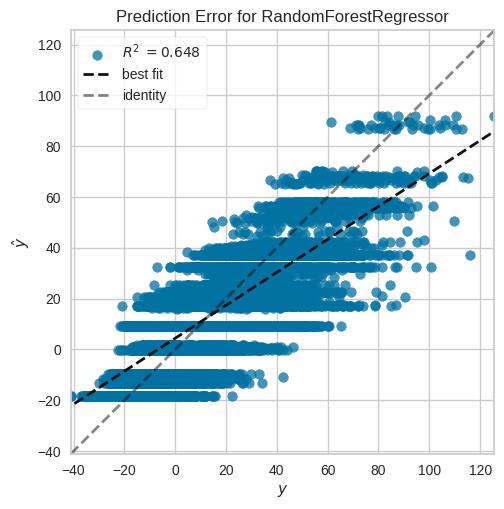

In [47]:
# Gráfico de errores de predicción

# best_fit: Línea de regresión que muestra el mejor ajuste posible de las predicciones del modelo.
# Indica el objetivo ideal a alcanzar.
# identity: Línea donde las predicciones son iguales a los valores reales (y_pred = y_real).
# Representa el rendimiento perfecto del modelo, sirviendo como referencia.
visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);

**Residuals Plot - Quick Method** https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

In [48]:
from yellowbrick.regressor import residuals_plot

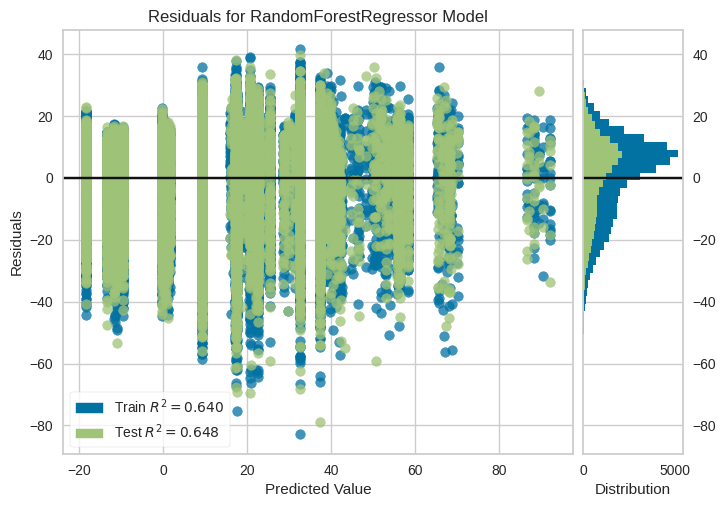

In [49]:
# Gráfico de residuos

# Visualiza el comportamiento de los residuos de los datos de prueba en comparación con los datos de entrenamiento
# Azul: entrenamiento, Verde: prueba
viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);

**Análisis y descripción**

**¿Qué hace?**

* Entrena un RandomForestRegressor con profundidad máxima 5.

* Evalúa su rendimiento con RMSE, MAE y R².

* Visualiza:

>* Prediction Error Plot: cómo se distribuyen las predicciones vs. valores reales.
>
>* Residuals Plot: distribución y dispersión de los errores.

**¿Qué se identificó?**

**Métricas:**

>* **`RMSE:`** 13.75 min → mejora importante respecto al baseline (~23 min).
>
>* **`MAE:`** 11.03 min → error absoluto medio reducido en ~7.5 min.
>
>* **`R²:`** 0.648 → explica aprox. 65% de la variabilidad de delay.

**Prediction Error Plot:**

>* La nube de puntos está relativamente cerca de la línea de identidad, con ligera dispersión para retrasos altos.
>
>* Best fit y identity están próximas → buen ajuste general.

**Residuals Plot:**

>* Residuos distribuidos alrededor de 0 (sin sesgo evidente).
>
>* Similares en train y test → sin sobreajuste grave.
>
>* Algunos valores extremos (outliers) siguen presentes, sobre todo en retrasos grandes.

**¿Qué se puede hacer?**

* Ajustar hiperparámetros (n_estimators, max_features, min_samples_split) para mejorar precisión.

* Probar profundidades mayores para capturar patrones más complejos (cuidando el sobreajuste).

* Hacer selección/ingeniería de características para ver si se gana más explicabilidad.

* Considerar modelos adicionales (Gradient Boosting, XGBoost, LightGBM) para comparar.

**Conclusión breve**

* Random Forest reduce el error de manera significativa respecto al baseline.

* Explica ~65% de la variabilidad en los retrasos.

* Muestra buen equilibrio entre ajuste y generalización, aunque aún hay margen para optimizar y reducir los residuos en retrasos altos.

### <font color='#6595F6'>**Realizando cross validation**</h3>

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

**Descripción de métodos nuevos antes del código**

* **`KFold:`** técnica de validación cruzada que divide el dataset en k particiones (folds).

>* **`n_splits:`** número de folds.
>
>* **`shuffle:`** mezcla las filas antes de dividir.
>
>* **`random_state:`** asegura reproducibilidad.

* **`cross_validate:`** ejecuta validación cruzada y devuelve métricas de entrenamiento y prueba.

>* **`scoring:`** diccionario con las métricas a calcular.
>
>* En métricas de error (RMSE, MAE) se usan las versiones negativas **`(neg_root_mean_squared_error` , `neg_mean_absolute_error`**) porque Scikit-learn maximiza el score por defecto.

* **`scoring`** **diccionario:**

>* **`'RMSE': 'neg_root_mean_squared_error'`** → devuelve -RMSE (lo convertimos luego a positivo).
>
>* **`'MAE:': 'neg_mean_absolute_error'`** → devuelve -MAE (igual, convertir a positivo).
>
>* **`'R2': 'r2'`** → R² estándar.

In [50]:
from sklearn.model_selection import KFold, cross_validate

In [51]:
# Definimos nuestro scoring generando un diccionario, similar al que manejamos al inicio,
# pero aquí cambia porque los recursos de validación cruzada de sklearn requieren que utilicemos una función de utilidad.
# Una función de utilidad significa que mientras mayor sea el error calculado, mejor será nuestro modelo.
# En los puntajes anteriores, utilizábamos funciones de costo, donde mientras menor el error,
# mejor el modelo. Aquí queremos maximizar el error, por eso utilizamos la versión negativa: neg_root_mean_squared_error, etc

# Definimos las métricas a evaluar (versiones negativas para RMSE y MAE)
scoring = {
    'RMSE': 'neg_root_mean_squared_error',  # RMSE (negativo)
    'MAE:': 'neg_mean_absolute_error',      # MAE (negativo)
    'R2': 'r2'                              # R² estándar
}

# Definimos validación cruzada KFold con 5 particiones, mezclando datos
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Ejecutamos la validación cruzada con el modelo Random Forest entrenado antes
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv )

cv_results

# Vemos que hay consistencia en nuestros resultados

{'fit_time': array([3.64341569, 3.18587041, 2.88651109, 2.95779037, 3.87994599]),
 'score_time': array([0.08432484, 0.05990481, 0.05747819, 0.0553298 , 0.05616546]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE:': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

**Análisis y descripción**

**¿Qué hace?**

* Aplica validación cruzada **5-fold** sobre el set de entrenamiento (X_train, y_train).

* Evalúa cada fold usando **RMSE, MAE y R²**.

* Devuelve también tiempos de ajuste (fit_time) y de scoring (score_time).

**¿Qué se identificó?**

* **RMSE** (negativo en salida): valores en torno a **-13.77 a -13.99** → en positivo ≈ **13.8 min** de error típico por fold.

* **MAE** (negativo en salida): valores en torno a **-11.03 a -11.26** → en positivo ≈ **11.1 min**.

* **R²**: consistente en todos los folds (**0.634 a 0.646**), indicando estabilidad del modelo.

* Poca variabilidad entre folds → el modelo es estable con estos datos.

**¿Qué se puede hacer?**

* Promediar métricas para tener un valor único representativo:

```
import numpy as np
rmse_mean = -np.mean(cv_results['test_RMSE'])
mae_mean = -np.mean(cv_results['test_MAE:'])
r2_mean = np.mean(cv_results['test_R2'])
```
* Comparar estas métricas promediadas con las del entrenamiento inicial para confirmar que no hay sobreajuste.

* Probar otros modelos y comparar en las mismas condiciones de validación cruzada.

**Conclusión breve**

* El **Random Forest** mantiene un rendimiento estable en todas las particiones del entrenamiento, con **RMSE ≈ 13.8 min, MAE ≈ 11.1 min y R² ≈ 0.64**.

* Esto confirma que el modelo generaliza bien dentro del conjunto de entrenamiento y está listo para pruebas con hiperparámetros más afinados.

---
**En esta clase, aprendiste a:**

* Construir un modelo de machine learning como baseline;
* Evaluar el modelo de baseline de acuerdo con las métricas RMSE, MAE y R2;
* Superar el modelo de baseline con un modelo más complejo (RandomForestRegressor);
* Evaluar el RandomForestRegressor gráficamente y con las métricas RMSE, MAE y R2;
* Realizar la validación cruzada con el RandomForestRegressor.
---

## <font color='#276CF2'>**4. Optimización de hiperparámetros**</h2>

### <font color='#6595F6'>**Feature importances**</h3>

**Métodos / objetos nuevos (mini-glosario arriba del código)**

* **`modelo.feature_importances_:`** vector numpy con la importancia (impureza promedio disminuida) de cada feature en RandomForest. Suma ≈ 1.

* **`pd.DataFrame({...}):`** crea un DataFrame desde un diccionario.

* **`.sort_values(col, ascending=False):`** ordena filas por una columna.

* **`.values:`** devuelve el array numpy subyacente de una Serie/columna.

* **Slicing** **`[:i]:`** toma desde el inicio hasta la posición i (excluye i).

* **Comprensión de listas:** **`[i if i != 0 else 1 for i in range(...)]`** → construye una lista de cortes, sustituyendo 0 por 1 para evitar un conjunto vacío.

* **Indexado de columnas por lista:** **`X_train[selected_features]`** → selecciona solo esas columnas.



In [61]:
# Ver columnas disponibles y conteo
df.columns      # confirma nombres de features post-encoding
len(df.columns) # aquí: 31 atributos (incluye 'delay' todavía en df original)

Index(['schengen', 'arrival_time', 'is_holiday', 'delay', 'is_weekend',
       'airline_BZ', 'airline_MM', 'airline_YE', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Boeing 737',
       'aircraft_type_Boeing 777', 'aircraft_type_Boeing 787',
       'aircraft_type_Embraer E175', 'origin_AUZ', 'origin_CNU', 'origin_CSF',
       'origin_EMM', 'origin_FJB', 'origin_MWL', 'origin_PUA', 'origin_TCY',
       'origin_TZF', 'origin_ZQO', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')

In [62]:
len(df.columns) # 31 atributos

31

In [66]:
# Ver si todos esos atributos son realmente importantes

# Devuelve un NumPy array con el porcentaje de importancia de cada feature
# Importancias de features (entrenadas con el modelo RF previo)
importances = modelo.feature_importances_     # array (n_features,) que suma ≈ 1
importances

array([3.39814918e-06, 3.60417588e-02, 1.45895991e-01, 6.10861947e-05,
       5.30319673e-01, 1.36989042e-05, 2.14417900e-05, 1.00746574e-01,
       5.76173558e-02, 5.18974843e-04, 8.83162236e-05, 2.64390542e-02,
       4.58830752e-02, 1.01922847e-04, 1.71891675e-04, 1.59736760e-02,
       3.57450957e-05, 9.21269997e-05, 5.42552087e-04, 1.03212932e-02,
       2.09099647e-02, 6.63707069e-03, 2.64070312e-04, 8.68597522e-04,
       1.00052465e-04, 2.79146627e-05, 7.17673254e-05, 3.72705034e-05,
       1.06499638e-04, 8.71862374e-05])

In [69]:
# Creamos un dataframe de nombre feature_importances, y colocaremos un diccionario, en el cual,
# crearemos una llave que llamaremos 'Features', que serán las columnas de nuestro DF de entrenamiento, y otra que será
# 'Importances', que representará las importancias

# DataFrame ordenado de importancias (en % y con 2 decimales)
feature_importances = pd.DataFrame({
    'Features': X.columns,                         # columnas del set de entrenamiento usado por el modelo
    'Importances': (importances * 100).round(2)    # a porcentaje con 2 decimales
}).sort_values('Importances', ascending=False)

feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [70]:
[i if i !=0 else 1 for i in range(0,35,5)]

[1, 5, 10, 15, 20, 25, 30]

In [71]:
# Creamos un DataFrame vacío donde guardaremos las métricas de evaluación
# Las filas serán las métricas (RMSE, MAE, R²) y las columnas serán el número de features usadas
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

# Definimos el modelo base de Random Forest con profundidad máxima de 5 y semilla para reproducibilidad
model_features = RandomForestRegressor(max_depth=5, random_state=42)

# Creamos una lista de valores que representarán la cantidad de features a usar en cada iteración
# range(0, 35, 5) genera: 0, 5, 10, 15, 20, 25, 30
# La list comprehension reemplaza el 0 por 1 para evitar entrenar con 0 features
# Ejemplo: [1, 5, 10, 15, 20, 25, 30]
ct_features = [i if i != 0 else 1 for i in range(0, 35, 5)] # si i es distinto de 0, entonces coloca 1, en caso contrario, aplicar el rango

# Iteramos sobre cada cantidad de features definida en ct_features
for i in ct_features:
    # Tomamos los nombres de las 'i' features más importantes según el ranking en 'feature_importances'
    selected_features = feature_importances['Features'].values[:i] #toma todos los valores hasta i

    # Filtramos los sets de entrenamiento y prueba para quedarnos solo con esas features seleccionadas
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    # Entrenamos el modelo usando solo esas 'i' features
    model_features.fit(X_train_sel, y_train)

    # Generamos las predicciones sobre el set de prueba
    y_pred = model_features.predict(X_test_sel)

    # Calculamos las métricas RMSE, MAE y R² para esas predicciones
    metricas = calcular_regresion(y_test, y_pred)

    # Guardamos los valores de las métricas como una columna en el DataFrame 'resultados'
    # La columna estará etiquetada con el valor de 'i' (cantidad de features usadas)
    resultados[i] = list(metricas.values())

# Mostramos la tabla comparativa: filas son métricas, columnas son cantidad de features
resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [72]:
# Volvemos a crear un DataFrame vacío para guardar resultados de otra prueba
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

# Definimos nuevamente el modelo base
model_features = RandomForestRegressor(max_depth=5, random_state=42)

# En este caso, la lista de iteraciones será el rango de 10 a 15 features
# Esto nos permite afinar la búsqueda para ver cuál es el número óptimo de variables
ct_features = range(10, 16) # rango de 10 a 15

# Iteramos sobre cada cantidad de features de este rango
for i in ct_features:
    selected_features = feature_importances['Features'].values[:i] #toma todos los valores hasta i
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]
    model_features.fit(X_train_sel, y_train)
    y_pred = model_features.predict(X_test_sel)
    metricas = calcular_regresion(y_test, y_pred)
    resultados[i] = list(metricas.values())

# Mostramos la tabla con resultados de usar entre 10 y 15 features
resultados

# A partir de esta tabla, determinamos que el mejor resultado se obtiene con 13 features

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [73]:
# Guardamos las 13 features más importantes según 'feature_importances'
selected_features = feature_importances['Features'].values[:13]

# Creamos un nuevo DataFrame X que contiene únicamente esas 13 features
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [74]:
# Dividimos los datos en entrenamiento y prueba usando solo las 13 features seleccionadas
# Manteniendo la misma semilla para garantizar reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

**Análisis del código de selección de características con Random Forest**

**Bloque 1: ver columnas y conteo**  
**¿Qué hace?**  
* Ejecuta `df.columns` para listar los nombres de columnas del `DataFrame` y `len(df.columns)` para contar cuántas hay.  

**¿Qué se identificó?**  

* Se confirmaron **31 atributos** en `df` tras el preprocesamiento (incluye aún `delay` en el `DataFrame` original). Esto sirve como punto de control antes de calcular importancias y filtrar variables.

**Conclusión breve**  

* El conjunto de datos está listo para calcular importancias y proceder con la selección basada en ranking.

**Bloque 2: obtener e integrar importancias de `RandomForest`**  

**¿Qué hace?**  

* Usa `modelo.feature_importances_` para recuperar un `array` con la importancia relativa de cada variable (suma ≈ 1). Luego construye el `DataFrame` `feature_importances` con dos columnas: `Features` (nombres de columnas en `X`) e `Importances` (porcentajes redondeados a 2 decimales). Finalmente ordena de mayor a menor con `.sort_values('Importances', ascending=False)`.  

**¿Qué se identificó?**  

* El ranking muestra qué variables aportan más a la reducción de impureza del bosque. Con tus resultados previos: **`airline_BZ`**, **`is_holiday`**, **`aircraft_type_Airbus A320`**, **`aircraft_type_Airbus A330`**, **`aircraft_type_Embraer E175`**, **`arrival_time`** y **`aircraft_type_Boeing 787`** concentran la mayor parte de la importancia; varias `day_name_*` y algunas `origin_*` pesan casi 0.

**Conclusión breve**  

* El ranking permite atacar una selección **top-k** objetiva, priorizando variables con mayor contribución al modelo.

**Bloque 3: evaluación por cantidad de features (saltos de 5 en 5)**  

**¿Qué hace?**  

*  Crea un `DataFrame` `resultados` indexado por `RMSE`, `MAE`, `R2`. Define `model_features = RandomForestRegressor(max_depth=5, random_state=42)`.  
*  Genera `ct_features = [1, 5, 10, 15, 20, 25, 30]` para probar cantidades crecientes de variables.  
*  En cada iteración `i`:  
>* `selected_features = feature_importances['Features'].values[:i]` toma las `i` mejores variables.  
>* Filtra `X_train`/`X_test` con esas columnas.  
>* Entrena y predice.  
>* Calcula métricas con `calcular_regresion`.  
>* Guarda `RMSE`, `MAE`, `R2` en `resultados[i]`.  

**¿Qué se identificó?**  

*  La tabla resultante muestra una **mejora rápida** al pasar de 1 a 10 variables (caída grande de `RMSE` y `MAE`, aumento de `R2`). A partir de 10–15 variables se observa **meseta**: las métricas casi no cambian (en tus números, `RMSE` cerca de **13.75**, `MAE` ~**11.03**, `R2` ~**0.647**).  

**Conclusión breve**  

*  Usar muchas más variables que las top-10 no aporta mejoras relevantes con `max_depth=5`. La ganancia marginal se estabiliza.

**Bloque 4: evaluación afinada (rango 10 a 15)**  

**¿Qué hace?**  

*  Repite el proceso anterior, pero con `ct_features = range(10, 16)` para afinar el **punto óptimo**. En cada `i` se seleccionan las `i` mejores columnas, se entrena y se guardan métricas en `resultados`.  

**¿Qué se identificó?**  

*  Entre 10 y 15 variables, `RMSE` y `MAE` varían mínimamente (tercera o cuarta cifra decimal). La mejor combinación en tu tabla se logra con **13 features** (`RMSE` ≈ **13.75**, `MAE` ≈ **11.03**, `R2` ≈ **0.647**).

**Conclusión breve**  

*  **13 variables** capturan prácticamente todo el poder predictivo que el modelo puede extraer sin agregar complejidad innecesaria.

**Bloque 5: construcción del conjunto final y partición**  

**¿Qué hace?**  

*  `selected_features = feature_importances['Features'].values[:13]` fija el conjunto de las 13 mejores.  
*  `X_selected_features = X[selected_features]` crea la matriz de diseño con solo esas columnas.  
*  `train_test_split(X_selected_features, y, random_state=42)` vuelve a partir en entrenamiento y prueba manteniendo semilla para reproducibilidad.

**¿Qué se identificó?**  

*  El `X` final queda compacto, con las columnas que explican la mayor parte de la variación de `delay`. La nueva partición prepara el terreno para reentrenar y reportar métricas consistentes con este set reducido.  

**Conclusión breve**  

*  Se consolida un **pipeline** con las 13 variables más relevantes y una partición reproducible, listo para evaluación final y para comparar directamente contra el modelo con todas las variables.

---

**Resumen corto**  
* Se verificaron **31 columnas** tras el preprocesamiento.  
* Se construyó un ranking de importancias y se evaluó rendimiento en función de `top-k`.  
* El desempeño mejora con rapidez hasta **10 variables** y luego entra en *meseta**; la mejor configuración observada es con **13 features** (aprox. `RMSE` **13.75**, `MAE` **11.03**, `R2` **0.647**).  
* Se fijó el set final de 13 columnas, generando `X_selected_features` y una nueva partición para continuar el modelado.

### <font color='#6595F6'>**Optimizando hiperparámetros con GridSearchCV**</h3>

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Permite realizar una búsqueda exhaustiva de los parámetros especificados para un estimador:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

**Métodos nuevos usados (breve glosario arriba del código)**

* **`GridSearchCV(estimator, param_grid, scoring, cv):`** busca exhaustivamente la mejor combinación de hiperparámetros según una métrica (**`scoring`**) usando validación cruzada (**`cv`**). Por defecto **`refit=True`**, por lo que re-entrena el mejor modelo en **todo el set de entrenamiento**.

* **`KFold(n_splits, shuffle, random_state):`** particiona el conjunto en **`k `**folds; con **`shuffle=True`** mezcla previamente y **`random_state`** hace reproducible.

* **`best_params_:`** diccionario con la mejor combinación encontrada.

* **`predict():`** en **`GridSearchCV`**, predice con el mejor estimador ya reentrenado (**`best_estimator_`**) si **`refit=True`** (por defecto).

* **`RandomForestRegressor`** hiperparámetros clave:
> **`max_depth`** (profundidad de cada árbol), **`min_samples_leaf`** (mín. de muestras en hoja), **`min_samples_split`** (mín. de muestras para dividir), **`n_estimators`** (cantidad de árboles).

In [82]:
param_grid = {
              'max_depth':[5,10,15], #profundidad máxima de los árboles
              'min_samples_leaf':[1,2,3], # mínimo de muestras para una hoja
              'min_samples_split':[2,4,6], # mínimo de muestras para dividir un nodo
              'n_estimators':[100,150,200] # número de estimadores (árboles del bosque)
             }

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
# Esquema de validación cruzada: 5 folds, con mezcla y semilla para reproducibilidad
cv = KFold(n_splits=5,shuffle=True,random_state=42)

# Instanciamos la búsqueda en rejilla:
# - Estimador base: RandomForestRegressor con semilla fija
# - Métrica a maximizar: R^2
# - Esquema de CV: cv definido arriba
model_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid = param_grid, scoring='r2',
                          cv=cv)

# Ejecuta la búsqueda: entrena y evalúa todas las combinaciones sobre los folds
model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [85]:
# Hiperparámetros óptimos encontrados por la rejilla (según R^2 en CV)
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [86]:
# Predicción en el set de prueba con el mejor modelo
# (GridSearchCV reentrena automáticamente el mejor estimador en todo X_train si refit=True)
y_pred_grid = model_grid.predict(X_test)

# Cálculo de métricas en test para el mejor modelo
metricas_model_grid = calcular_regresion(y_test, y_pred_grid)
metricas_model_grid  # {'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [87]:
# Agregamos estas métricas a la tabla comparativa 'resultados'
# (se ven al lado de las columnas 10..15 features de la búsqueda previa)
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


**Análisis del funcionamiento**

**¿Qué hace?**

Realiza una búsqueda exhaustiva de hiperparámetros para **`RandomForestRegressor`** con validación cruzada 5-fold (**`KFold`**). Selecciona la combinación que maximiza **`R2`** en **CV**, re-entrena el mejor modelo en todo **`X_train`** y evalúa en **`X_test`**. Luego integra las métricas en la tabla resultados para comparar contra las configuraciones previas (**10–15 features**).

**¿Qué se identificó?**

* Los mejores hiperparámetros reportados son **`{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}`**. Con este ajuste, en **`X_test`** se obtienen:

>* **`RMSE`** = **13.2308**
>
>* **`MAE`** = **10.6296**
>
>* **`R2`** = **0.6754**

* Comparado con el mejor resultado previo usando 13 features y los hiperparámetros por defecto del bloque anterior (RMSE ≈ 13.7497, MAE ≈ 11.0285, R2 ≈ 0.6476), la mejora es:

>* ΔRMSE ≈ −0.5189 minutos (13.7497 → 13.2308)
>
>* ΔMAE ≈ −0.3989 minutos (11.0285 → 10.6296)
>
>* ΔR2 ≈ +0.0278 (0.6476 → 0.6754)

**Conclusión breve**

La optimización con **`GridSearchCV`** mejora de forma consistente el desempeño del **Random Forest** en test: baja el error **(RMSE/MAE**) y sube **`R2`**. El esquema **5-fold** con **`shuffle`** y **`random_state`** asegura resultados estables y reproducibles, y el **`best_estimator_`** queda listo para usarse en producción o para posteriores análisis (importancias, gráficos de error, etc.).

### <font color='#6595F6'>**Serializando el modelo**</h3>

### <font color='#6595F6'>**Manos a la obra: utilizando el modelo guardado**</h3>